# Project 1 [CITS5017] Deep Learning
### Stefan Nio [23104714]
### 15% Weighting, Due Friday, 13th September 2024


### 1. Outline
In this project you will deal with a small colour image dataset containing 10 classes. Each image has
64×64 pixels. Although both the training set and validation set are perfectly balanced, there are only 200
training instances available for each class. Your tasks for this project are to train a CNN model, to retrain
a pre-trained model through transfer learning, and compare the performances of these two models. This
project is a good practical exercise to test your understanding of the techniques covered in Chapters 10,
11, and 14.


### 2. Submission
Submit your three files above (a .ipynb file and two .keras model files to cssubmit (https://secure.csse.uwa.edu.au/run/cssubmit).


Name your Jupyter Notebook file as Surname FirstName-proj1.ipynb (please replace Surname and
FirstName1 by your own surname and first name). Please save your two trained models to the files Surname FirstName-CNN.keras and Surname FirstName-MobileNetV2.keras. You need to make sure
that your models were saved in the same directory (i.e., not under a subdirectory) with your Notebook
file, as this is what we will assume in our marking process.

### 3. The Image Dataset
Two pickle files, train.pkl and val.pkl, are supplied on the LMS page of the unit. Download these two
files and save them in the same directory where you would develop your code. Use the following code
to load the data:

In [1]:
def load_data(pickle_file):
    import pickle
    with open(pickle_file, "rb") as f:
        data_set = pickle.load(f)
    return data_set[b"data"], data_set[b"labels"], data_set[b"class_names"]
    
# now call load_data to form training and validation sets
X_train, y_train, class_names = load_data("train.pkl")
X_val, y_val, _ = load_data("val.pkl")

In [2]:
X_train.shape

(2000, 64, 64, 3)

In [3]:
X_val.shape

(500, 64, 64, 3)

In [4]:
y_train.shape

(2000,)

In [5]:
y_val.shape

(500,)

In [6]:
class_names

['albatross',
 'baboon',
 'centipede',
 'crane',
 'goldfish',
 'goose',
 'ladybug',
 'lifeboat',
 'slug',
 'snail']

You should find that the shapes of `X_train` and `X_val` are `(2000, 64, 64, 3)` and `(500, 64, 64, 3)` respectively, i.e., there are 200 instances per class in the training set and 50 instances per class in the validation
set. Both `X_train` and `X_val` are of type `uint8` (8-bit unsigned integer, just enough to represent any
pixel value in the range 0 · · · 255). In the training (or validation) set, the first 200 (or 50) instances are for
class 0, the next 200 (or 50) instances are for class 1 and so on. You should randomly shuffle
the training
set (and optionally the validation set) to make sure that the minibatches used in the training process later
on have a good mix of the 10 classes.

In [7]:
import numpy as np
# Shuffle the training set
indices_train = np.random.permutation(X_train.shape[0])
X_train = X_train[indices_train] / 255
y_train = y_train[indices_train]

# Optionally shuffle the validation set
indices_val = np.random.permutation(X_val.shape[0])
X_val = X_val[indices_val] / 255
y_val = y_val[indices_val]

In [8]:
X_train

array([[[[0.25098039, 0.59607843, 0.87843137],
         [0.25882353, 0.58431373, 0.85882353],
         [0.37254902, 0.65098039, 0.90980392],
         ...,
         [0.34509804, 0.55686275, 0.80784314],
         [0.32941176, 0.51372549, 0.78039216],
         [0.35294118, 0.51764706, 0.8       ]],

        [[0.22352941, 0.58039216, 0.85882353],
         [0.18431373, 0.51764706, 0.78039216],
         [0.24313725, 0.53333333, 0.78823529],
         ...,
         [0.34509804, 0.58431373, 0.83137255],
         [0.31372549, 0.52941176, 0.79215686],
         [0.25490196, 0.4627451 , 0.72941176]],

        [[0.32156863, 0.68627451, 0.95686275],
         [0.2627451 , 0.60392157, 0.86666667],
         [0.25882353, 0.55686275, 0.8       ],
         ...,
         [0.39607843, 0.68627451, 0.9254902 ],
         [0.34117647, 0.61960784, 0.87058824],
         [0.2627451 , 0.53333333, 0.78823529]],

        ...,

        [[0.23529412, 0.19607843, 0.19215686],
         [0.09019608, 0.04705882, 0.07058824]

### 4. Tasks
(i). Write a small function called displayImages that would take in appropriate arguments so that it
can be used to display 20 randomly sampled images from the arguments. This function should be
called 2 times – for the training set and for the validation set. The figure displayed by the function
should show the corresponding class name of each image.

Displaying 20 Images from the Training set


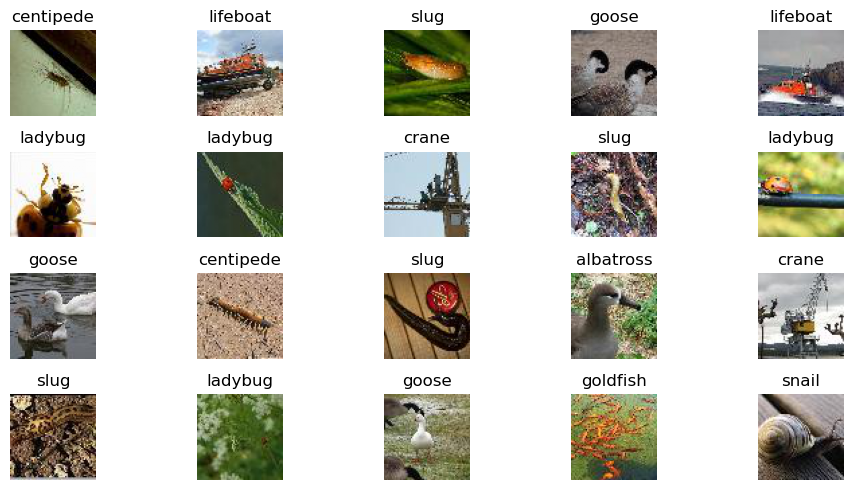


Displaying 20 Images from the Validation set


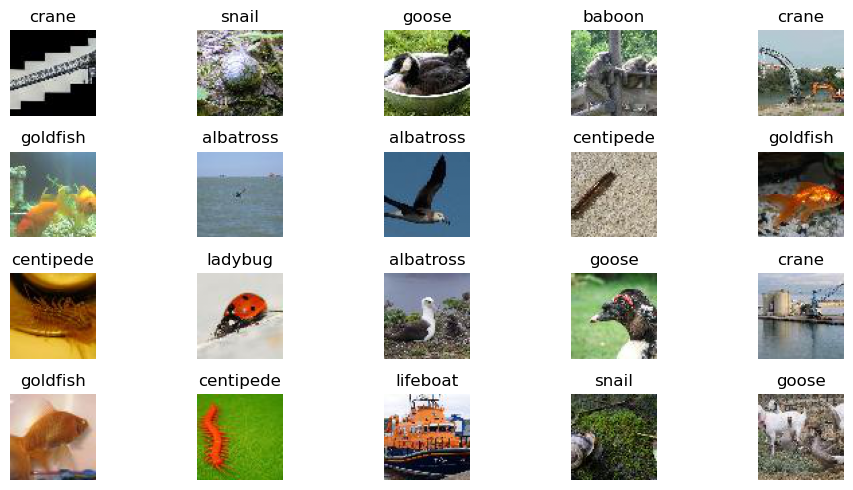

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def displayImages(X, y, class_names, num_images=20):
    """
    Displays a grid of random images from the dataset along with their corresponding class names.
    
    Parameters:
    X (numpy array): The dataset of images (shape: num_samples, 64, 64, 3).
    y (numpy array): The labels corresponding to the images.
    class_names (list): A list of class names corresponding to the labels.
    num_images (int): Number of random images to display. Default is 20.
    """
    # Randomly sample indices from the dataset
    random_indices = np.random.choice(X.shape[0], num_images, replace=False)
    
    # Set up the plot with 4x5 grid
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(random_indices):
        plt.subplot(4, 5, i+1)
        plt.imshow(X[idx])
        plt.title(class_names[y[idx]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Displaying 20 Images from the Training set")
displayImages(X_train, y_train, class_names)

print("")
print("Displaying 20 Images from the Validation set")
displayImages(X_val, y_val, class_names)

### (ii). Implementation of a CNN
Design a CNN that has 3 to 4 convolutional layers with appropriate activation function(s) and
some pooling layers. Before the output layer, you will need to have 1 to 2 fully connected layers and maybe *batch normalisation* layers to help control the numerical values of the network
weights. Add one or two DropOut layers to your network. Use an appropriate function from
`tensorflow.keras` to show a summary of your CNN architecture.

You should manually explore two possible settings for each of the following three hyperparameters:
- kernel size;
- number of kernels (*kernels and filters are interchangeable*)
- the dropout rate. 

Choose a suitable optimizer and a suitble learning rate scheuler to train your CNN. Use your
validation set to help you find the optimal values for the hyperparameters above.

You should use the validation set above to help you find the optimal value for each of three hyperparameters above. In the final version of your Notebook file, copy your hyperparameter tuning
code to a markdown cell and describe the hyperparameter values that you experimented and your
finding for the optimal hyperparameter values in the markdown cell.

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import HyperParameters, Hyperband, RandomSearch, GridSearch

def build_cnn_with_hp(hp):
    """
    Build a CNN model using Keras Tuner with hyperparameters to GridSearch.
    
    Parameters:
    hp (HyperParameters): The hyperparameter objects to define search space.
    
    Returns:
    model: A compiled CNN model.
    """
    model = tf.keras.Sequential()

    # Hyperparameter tuning for kernel size, number of kernels (filters), and dropout rate
    kernel_size = hp.Choice('kernel_size', [3, 5])  # Grid search between 3x3 and 5x5
    num_kernels_1 = hp.Int('num_kernels_1', min_value=32, max_value=128, step=32)  # Grid search for 1st layer
    num_kernels_2 = hp.Int('num_kernels_2', min_value=64, max_value=256, step=64)  # Grid search for 2nd layer
    num_kernels_3 = hp.Int('num_kernels_3', min_value=128, max_value=512, step=128)  # Grid search for 3rd layer
    dropout_rate = hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1)  # Grid search for dropout rate

    model.add(tf.keras.layers.Conv2D(filters=num_kernels_1, kernel_size=kernel_size, activation='relu', input_shape=(64, 64, 3)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Conv2D(filters=num_kernels_2, kernel_size=kernel_size, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Conv2D(filters=num_kernels_3, kernel_size=kernel_size, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=256, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    # Output layer
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [11]:
from keras_tuner import GridSearch

# Define the tuner
tuner = GridSearch(
    build_cnn_with_hp,
    objective='val_accuracy',  # Optimizing for validation accuracy
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of model executions per trial (increases accuracy)
    directory='hyperparam_tuning',  # Directory where logs are stored
    project_name='cnn_tuning'
)

# Load your data
X_train, y_train, class_names = load_data("train.pkl")
X_val, y_val, _ = load_data("val.pkl")

indices_train = np.random.permutation(X_train.shape[0])
X_train = X_train[indices_train] / 255
y_train = y_train[indices_train]

indices_val = np.random.permutation(X_val.shape[0])
X_val = X_val[indices_val] / 255
y_val = y_val[indices_val]


/Users/stefn/anaconda3/envs/cits5017-2024/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-5)

# Perform hyperparameter search with the callbacks
tuner.search(X_train, y_train, 
             epochs=100, 
             validation_data=(X_val, y_val),
             callbacks=[early_stopping, lr_scheduler])

# Get the best hyperparameters and build the best model
best_hp = tuner.get_best_hyperparameters()[0]
best_model = tuner.hypermodel.build(best_hp)

# Display the model summary
best_model.summary()

Trial 10 Complete [00h 03m 44s]
val_accuracy: 0.5759999752044678

Best val_accuracy So Far: 0.6079999804496765
Total elapsed time: 00h 45m 44s


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,309,258 (4.99 MB)

 Trainable params: 1,308,298 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [13]:
# Build the best model using the optimal hyperparameters
best_model = tuner.hypermodel.build(best_hp)

# Train the model with the best hyperparameters
history = best_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.1976 - loss: 3.1361 - val_accuracy: 0.1020 - val_loss: 2.4738
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.3166 - loss: 2.2942 - val_accuracy: 0.0980 - val_loss: 2.8140
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.3462 - loss: 2.0523 - val_accuracy: 0.0980 - val_loss: 2.7713
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.3913 - loss: 1.8584 - val_accuracy: 0.1560 - val_loss: 2.6842
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.4337 - loss: 1.7184 - val_accuracy: 0.1740 - val_loss: 2.3560
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.4651 - loss: 1.5768 - val_accuracy: 0.2820 - val_loss: 2.0744
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.4610 - loss: 1.5443 - val_accuracy: 0.3960 - val_loss: 1.7405
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.4959 - loss: 1.4750 - val_accu

In [41]:
# Save the best model
best_model.save('Nio_Stefan-CNN.keras')

In [15]:
# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]

# Print out the best hyperparameters
print("Best hyperparameters:")
print(f"Kernel Size: {best_hp.get('kernel_size')}")
print(f"Number of Kernels in the first layer: {best_hp.get('num_kernels_1')}")
print(f"Number of Kernels in the second layer: {best_hp.get('num_kernels_2')}")
print(f"Number of Kernels in the third layer: {best_hp.get('num_kernels_3')}")
print(f"Dropout Rate: {best_hp.get('dropout_rate')}")

Best hyperparameters:
Kernel Size: 3
Number of Kernels in the first layer: 32
Number of Kernels in the second layer: 64
Number of Kernels in the third layer: 128
Dropout Rate: 0.5


### Optimal Hyperparameters Found using KerasTuner GridSearch:
- **Kernel Size:** `3`
- **Number of Kernels in the first layer:** `32` 
- **Number of Kernels in the second layer:** `64` 
- **Number of Kernels in the third layer:** `128` 
- **Dropout Rate:** `0.5`

### (iii). Structure of your code
In the marking process, we want to have the following options to test your implementation of the
CNN model:

1. train your network from scratch for 100 epochs using the optimal hyperparameter values that
you have found above; or
2.  load your trained CNN model and train it for just 1 more epoch with a tiny learning rate (e.g.,
10−5
).

For option 1, we would test your code by temporarily moving your CNN keras model file to
somewhere else.

So, after describing your hyperparameter tuning process, your Python code should look something
like this:

```
if the CNN keras model file is present in the current directory
    load the model;
    display its architecture;
    train for one epoch.
else
    set up the model and display its architecture;
    train the model from scratch for 100 epochs with early stopping
        and the validation set using the optimal hyperparamter values;
    save the model to Surname_FirstName-CNN.keras
    show the learning curve plot for the training and validation set

use the model to perform predictions on the training and validation sets.
```


In [33]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

def build_cnn_model():
    # Using the optimal hyperparamaters found from GridSearch
    kernel_size = 3
    num_kernels_1 = 32
    num_kernels_2 = 64
    num_kernels_3 = 128
    dropout_rate = 0.5

    # Same architecture as before
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(num_kernels_1, (kernel_size, kernel_size), activation='relu', input_shape=(64, 64, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(num_kernels_2, (kernel_size, kernel_size), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(num_kernels_3, (kernel_size, kernel_size), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return model

# Check if the model exists in the current directory
model_path = 'Nio_Stefan-CNN.keras'
if os.path.exists(model_path):
    cnn_model = keras.models.load_model(model_path)
    print("Model architecture:")
    cnn_model.summary()
    cnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    cnn_model.fit(X_train, y_train, epochs=1, validation_data=(X_val, y_val))
else:
    cnn_model = build_cnn_model()
    print("Model architecture:")
    cnn_model.summary()
    cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    checkpoint = ModelCheckpoint(model_path, save_best_only=True)
    
    # Train the model
    history = cnn_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),
                        callbacks=[early_stopping, checkpoint])
    
    # Save the model
    cnn_model.save(model_path)

    # Plotting the learning curves
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.legend()
    plt.show()


Model architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,455,392 (13.18 MB)

 Trainable params: 1,151,562 (4.39 MB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 2,303,126 (8.79 MB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.7311 - loss: 0.7296 - val_accuracy: 0.5560 - val_loss: 1.4236


### Optimizer and Loss Function

In this model, we used the **Adam optimizer** and **sparse categorical cross-entropy loss function**. 

- **Adam Optimizer**: Adam (Adaptive Moment Estimation) is an extension of the Stochastic Gradient Descent (SGD) algorithm, which computes adaptive learning rates for each parameter, it is a robust and efficient optimizer that performs well in a wide variety of tasks. We used a **learning rate of 1e-5** during the fine-tuning phase to ensure small updates to weights, which helps avoid overshooting the minima in the later stages of training.

- **Sparse Categorical Cross-Entropy Loss**: This loss function is ideal for multi-class classification tasks when the target labels are integers. It measures how well the predicted probability distribution matches the true class labels. The "sparse" version is particularly useful when the class labels are provided as integers (as opposed to one-hot encoded vectors), making it more efficient for classification tasks with many classes.

### (iv). Transfer learning using MobileNetV2

Use the pretrained model *MobileNetV2* from the `tf.keras.applications` package as your
base model. Discard the last layer (or last couple of layers) and add on your own suitable
layer(s) for the image dataset mentioned above. To decide what layers to keep and what
you should add, refer to the example code in the Jupyter Notebook file for Chapter 14 from
the author Geron of the textbook. You will need to inspect the pretrained model (using ´
`model.summary()`, for instance) to find out its architecture, number of layers, name of each
layer, etc.

In [22]:
# Load the pretrained MobileNetV2 model, exclude the top fully connected layers
base_model = tf.keras.applications.MobileNetV2(input_shape=(64, 64, 3),
                                               include_top=False,  # Exclude the top classification layers
                                               weights='imagenet')

# Print model summary to inspect the architecture
base_model.summary()

# Get the number of layers in the model
num_layers = len(base_model.layers)
print(f"\nTotal number of layers in MobileNetV2: {num_layers}")

# Print out the names of each layer
for i, layer in enumerate(base_model.layers):
    print(f"Layer {i}: {layer.name}")

/var/folders/73/741h2hzd4k93zpm_pwxjrwm40000gn/T/ipykernel_21715/2751221227.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(64, 64, 3),


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 32, 32,    │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 32, 32,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 32, 32,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 32, 32,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 32, 32,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 32, 32,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 33, 33,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 16, 16,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 16, 16,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)


Total number of layers in MobileNetV2: 154
Layer 0: input_layer_3
Layer 1: Conv1
Layer 2: bn_Conv1
Layer 3: Conv1_relu
Layer 4: expanded_conv_depthwise
Layer 5: expanded_conv_depthwise_BN
Layer 6: expanded_conv_depthwise_relu
Layer 7: expanded_conv_project
Layer 8: expanded_conv_project_BN
Layer 9: block_1_expand
Layer 10: block_1_expand_BN
Layer 11: block_1_expand_relu
Layer 12: block_1_pad
Layer 13: block_1_depthwise
Layer 14: block_1_depthwise_BN
Layer 15: block_1_depthwise_relu
Layer 16: block_1_project
Layer 17: block_1_project_BN
Layer 18: block_2_expand
Layer 19: block_2_expand_BN
Layer 20: block_2_expand_relu
Layer 21: block_2_depthwise
Layer 22: block_2_depthwise_BN
Layer 23: block_2_depthwise_relu
Layer 24: block_2_project
Layer 25: block_2_project_BN
Layer 26: block_2_add
Layer 27: block_3_expand
Layer 28: block_3_expand_BN
Layer 29: block_3_expand_relu
Layer 30: block_3_pad
Layer 31: block_3_depthwise
Layer 32: block_3_depthwise_BN
Layer 33: block_3_depthwise_relu
Layer 34

Since the base model is a well-trained model for the same image classification task, no hyperparameter tuning work is required. After constructing your deep network using the base
model, display the **first and last 5 layers** of your network using the `summary()` function

In [26]:
# Freeze the base model's layers
base_model.trainable = False

# Add custom layers on top of the base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 output classes
])

# Build the model explicitly with the input shape
model.build((None, 64, 64, 3))  

# Now, you can print the model summary
model.summary()

# Display the first and last 5 layers with details
print("\nFirst 5 layers:")
for layer in model.layers[:5]:
    print(layer.name, layer.output)

print("\nLast 5 layers:")
for layer in model.layers[-5:]:
    print(layer.name, layer.output)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


First 5 layers:
mobilenetv2_1.00_224 <KerasTensor shape=(None, 2, 2, 1280), dtype=float32, sparse=False, name=keras_tensor_1108>
global_average_pooling2d_3 <KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_1121>
dense_15 <KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_1122>
dense_16 <KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_1123>

Last 5 layers:
mobilenetv2_1.00_224 <KerasTensor shape=(None, 2, 2, 1280), dtype=float32, sparse=False, name=keras_tensor_1108>
global_average_pooling2d_3 <KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_1121>
dense_15 <KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_1122>
dense_16 <KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_1123>


Follow the training strategy as described in Geron’s code. You will need to freeze layers ´
from the base model, try your model for a few epochs first. After that, try unfreezing layer
90 onward of the base model and training for 30 epochs with a very low learning rate (e.g.,
10−3
).

In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with frozen base layers
history = model.fit(X_train, y_train, epochs=5, 
                    validation_data=(X_val, y_val),
                    batch_size=32)

# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy after initial training: {val_acc:.4f}")

# Unfreeze the last few layers (from layer 90 onwards) for fine-tuning
for layer in base_model.layers[90:]:
    layer.trainable = True

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train again for fine-tuning
fine_tune_history = model.fit(X_train, y_train, epochs=30,
                              validation_data=(X_val, y_val),
                              batch_size=32)

# Evaluate after fine-tuning
fine_tune_val_loss, fine_tune_val_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy after fine-tuning: {fine_tune_val_acc:.4f}")

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3727 - loss: 1.8560 - val_accuracy: 0.6380 - val_loss: 1.0901
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8060 - loss: 0.6296 - val_accuracy: 0.6260 - val_loss: 1.1027
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9011 - loss: 0.3852 - val_accuracy: 0.6560 - val_loss: 1.1141
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9708 - loss: 0.2010 - val_accuracy: 0.6500 - val_loss: 1.1652
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9890 - loss: 0.1165 - val_accuracy: 0.6760 - val_loss: 1.1595
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6824 - loss: 1.1232
Validation accuracy after initial training: 0.6760
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.5317 - loss: 1.7022 - val_accuracy: 0.3280 - val_loss: 4.6902
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7483 - loss: 0.7978 - val_accuracy: 0.4220 - val_loss

Save your trained model to **Surname_FirstName-MobileNetV2.keras.**

In [28]:
model.save('Nio_Stefan-MobileNetV2.keras')

Apply the trained model to the training set and validation set and show the prediction accuracies and confusion matrices. Illustrate 10 examples from the validation set where the trained
model made correct predictions and 10 examples from the validation set where it did not.
You should make use of the `displayImages` function that you wrote earlier on for this task.

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Training accuracy: 0.8925
Validation accuracy: 0.6340


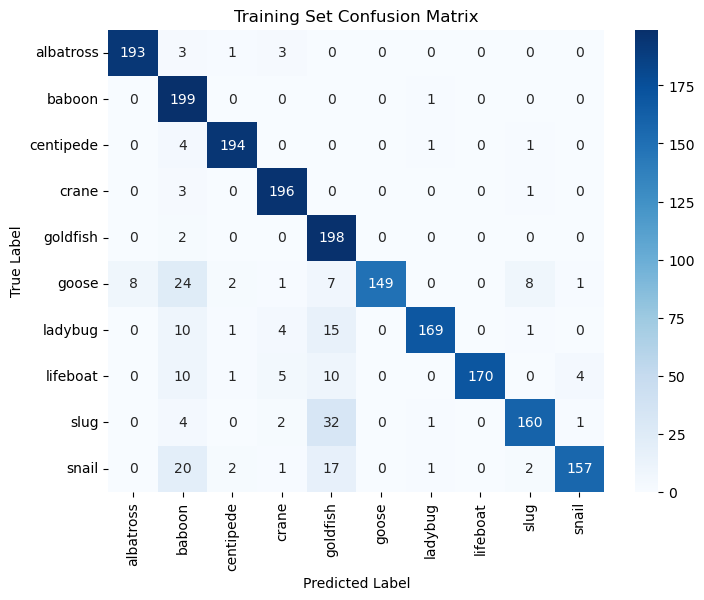

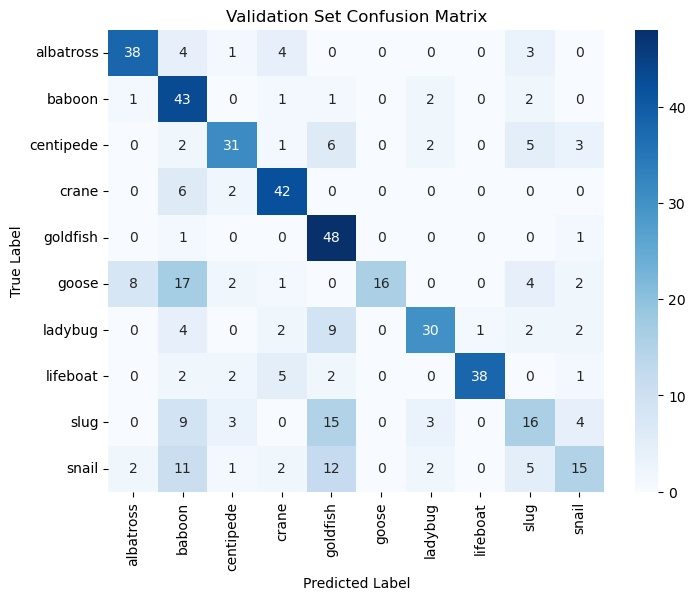

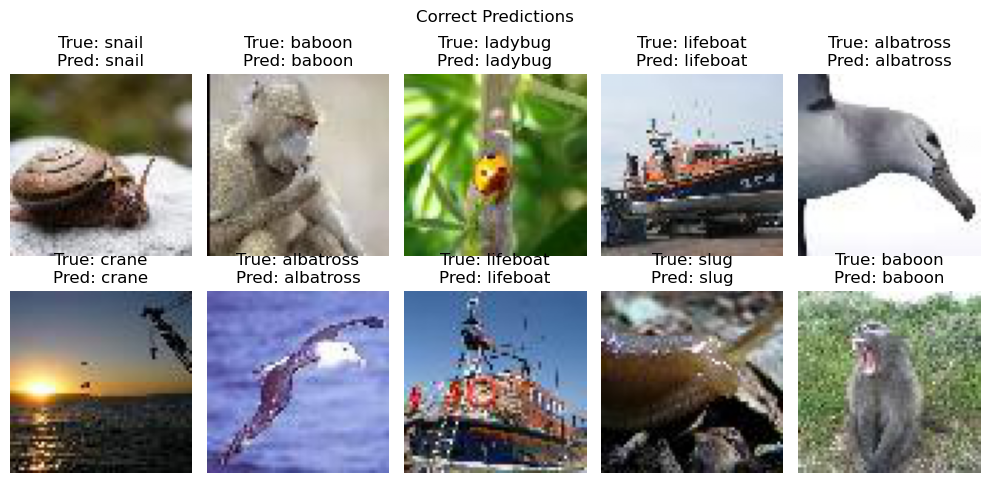

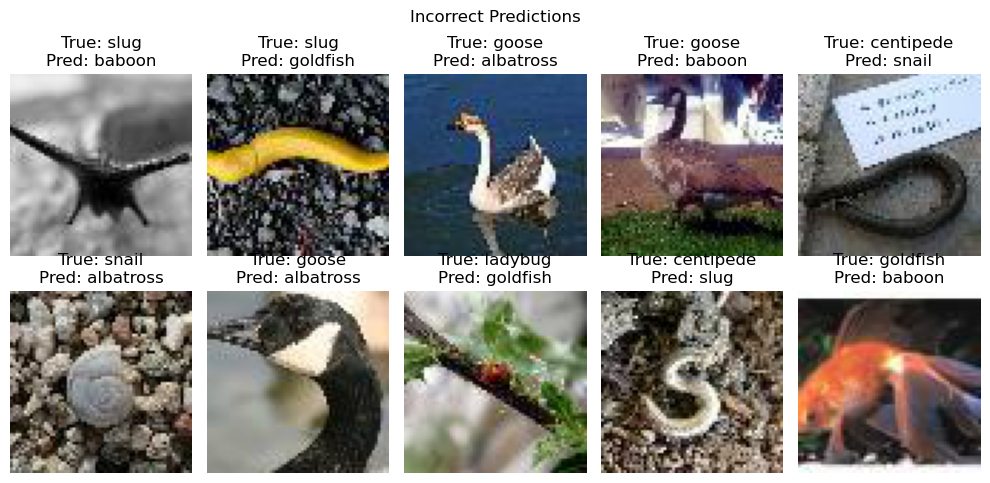

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Apply the trained model to the training set
train_predictions = np.argmax(model.predict(X_train), axis=1)
val_predictions = np.argmax(model.predict(X_val), axis=1)

# Compute accuracies
train_acc = accuracy_score(y_train, train_predictions)
val_acc = accuracy_score(y_val, val_predictions)

print(f"Training accuracy: {train_acc:.4f}")
print(f"Validation accuracy: {val_acc:.4f}")

# Generate confusion matrices
train_cm = confusion_matrix(y_train, train_predictions)
val_cm = confusion_matrix(y_val, val_predictions)

# Plot confusion matrices
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Display confusion matrices
plot_confusion_matrix(train_cm, class_names, "Training Set Confusion Matrix")
plot_confusion_matrix(val_cm, class_names, "Validation Set Confusion Matrix")

# Display correct and incorrect predictions from the validation set
correct_indices = np.where(val_predictions == y_val)[0]
incorrect_indices = np.where(val_predictions != y_val)[0]

# Function to display a specific set of images
def display_predicted_images(X, y_true, y_pred, class_names, indices, title, num_images=10):
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(indices[:num_images]):
        plt.subplot(2, 5, i+1)
        plt.imshow(X[idx])
        plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Display 10 correct predictions
display_predicted_images(X_val, y_val, val_predictions, class_names, correct_indices, "Correct Predictions", num_images=10)

# Display 10 incorrect predictions
display_predicted_images(X_val, y_val, val_predictions, class_names, incorrect_indices, "Incorrect Predictions", num_images=10)

Finally, compare and comment on the classification performances of your CNN model and
the retrained MobileNetV2 model on the training and validation sets, in terms of: accuracy,
F1 score, and precision per class. You should also compare the two models’ complexity
(e.g., number of trainable parameters), and training time per epoch – You can use any of the
Python modules, such as `time` or `timeit`, to help you.

In [31]:
import time
from sklearn.metrics import f1_score, precision_score

# Function to evaluate performance metrics
def evaluate_model(model, X_train, y_train, X_val, y_val):
    # Predictions for both training and validation sets
    train_predictions = np.argmax(model.predict(X_train), axis=1)
    val_predictions = np.argmax(model.predict(X_val), axis=1)

    # Accuracy
    train_acc = accuracy_score(y_train, train_predictions)
    val_acc = accuracy_score(y_val, val_predictions)

    # F1 Score
    train_f1 = f1_score(y_train, train_predictions, average='macro')  # Macro gives equal weight to all classes
    val_f1 = f1_score(y_val, val_predictions, average='macro')

    # Precision per class
    train_precision = precision_score(y_train, train_predictions, average=None)
    val_precision = precision_score(y_val, val_predictions, average=None)

    return train_acc, val_acc, train_f1, val_f1, train_precision, val_precision

In [35]:
def model_complexity(model):
    trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])
    non_trainable_params = np.sum([np.prod(v.shape) for v in model.non_trainable_weights])
    return trainable_params, non_trainable_params

cnn_trainable_params, cnn_non_trainable_params = model_complexity(cnn_model)  # Assuming cnn_model is defined
mobilenet_trainable_params, mobilenet_non_trainable_params = model_complexity(model)  # Using MobileNetV2 model

print(f"CNN Model: Trainable params: {cnn_trainable_params}, Non-trainable params: {cnn_non_trainable_params}")
print(f"MobileNetV2: Trainable params: {mobilenet_trainable_params}, Non-trainable params: {mobilenet_non_trainable_params}")

CNN Model: Trainable params: 1151562, Non-trainable params: 704
MobileNetV2: Trainable params: 2149770, Non-trainable params: 273472


In [37]:
# Function to time the training process
def measure_training_time(model, X_train, y_train, epochs=1, batch_size=32):
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    end_time = time.time()
    return (end_time - start_time) / epochs  # Average time per epoch

cnn_time_per_epoch = measure_training_time(cnn_model, X_train, y_train, epochs=5)
mobilenet_time_per_epoch = measure_training_time(model, X_train, y_train, epochs=5)

print(f"Training time per epoch (CNN): {cnn_time_per_epoch:.4f} seconds")
print(f"Training time per epoch (MobileNetV2): {mobilenet_time_per_epoch:.4f} seconds")

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.7539 - loss: 0.7096
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.7155 - loss: 0.8004
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.7017 - loss: 0.8596
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7106 - loss: 0.8158
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.7339 - loss: 0.7556
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9772 - loss: 0.0800
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9692 - loss: 0.0919
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9614 - loss: 0.1280
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9821 - loss: 0.0482
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9857 - loss: 0.0551
Training time per epoch (CNN): 4.2059 seconds
Training time per epoch (MobileNetV2): 2.7151 seconds


In [38]:
# Evaluate CNN Model
cnn_train_acc, cnn_val_acc, cnn_train_f1, cnn_val_f1, cnn_train_precision, cnn_val_precision = evaluate_model(cnn_model, X_train, y_train, X_val, y_val)

# Evaluate MobileNetV2 Model
mobilenet_train_acc, mobilenet_val_acc, mobilenet_train_f1, mobilenet_val_f1, mobilenet_train_precision, mobilenet_val_precision = evaluate_model(model, X_train, y_train, X_val, y_val)

# Print the comparison results
print(f"--- CNN Model ---")
print(f"Training Accuracy: {cnn_train_acc:.4f}, Validation Accuracy: {cnn_val_acc:.4f}")
print(f"Training F1 Score: {cnn_train_f1:.4f}, Validation F1 Score: {cnn_val_f1:.4f}")
print(f"Precision per class (Validation): {cnn_val_precision}")

print(f"\n--- MobileNetV2 Model ---")
print(f"Training Accuracy: {mobilenet_train_acc:.4f}, Validation Accuracy: {mobilenet_val_acc:.4f}")
print(f"Training F1 Score: {mobilenet_train_f1:.4f}, Validation F1 Score: {mobilenet_val_f1:.4f}")
print(f"Precision per class (Validation): {mobilenet_val_precision}")

# Print model complexity and training time
print(f"\nCNN Model Trainable Params: {cnn_trainable_params}, Non-Trainable Params: {cnn_non_trainable_params}")
print(f"MobileNetV2 Trainable Params: {mobilenet_trainable_params}, Non-Trainable Params: {mobilenet_non_trainable_params}")
print(f"\nTraining time per epoch (CNN): {cnn_time_per_epoch:.4f} seconds")
print(f"Training time per epoch (MobileNetV2): {mobilenet_time_per_epoch:.4f} seconds")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
--- CNN Model ---
Training Accuracy: 0.8795, Validation Accuracy: 0.5680
Training F1 Score: 0.8789, Validation F1 Score: 0.5708
Precision per class (Validation): [0.6122449  0.55172414 0.39215686 0.58823529 0.89795918 0.45454545
 0.7        0.82926829 0.32258065 0.42222222]

--- MobileNetV2 Model ---
Training Accuracy: 0.8870, Validation Accuracy: 0.6100
Training F1 Score: 0.8850, Validation F1 Score: 0.5829
Precision per class (Validation): [0.50588235 0.45263158 0.70588235 0.5625     0.85714286 0.53333333
 0.60273973 0.97368421 0.66666667 0.73076923]

CNN Model Trainable Params: 1151562, Non-Trainable Params: 704
MobileNetV2 Trainable Params: 2149770, Non-Trainable Params: 273472

Training time per epoch (CNN): 4.2059 seconds
Training time per epoch (MobileNetV2): 2.7151 seconds


### Results

#### 1. **Accuracy**
- **CNN Model**: 
  - **Training Accuracy**: 0.8795
  - **Validation Accuracy**: 0.5680
- **MobileNetV2 Model**: 
  - **Training Accuracy**: 0.8870
  - **Validation Accuracy**: 0.6100

**Comments**: The MobileNetV2 model has a slightly higher training and validation accuracy compared to the CNN model. This suggests that MobileNetV2 is better at generalizing to the unseen validation data, with a higher validation accuracy of 0.6100 compared to the CNN's 0.5680.

#### 2. **F1 Score**
- **CNN Model**:
  - **Training F1 Score**: 0.8789
  - **Validation F1 Score**: 0.5708
- **MobileNetV2 Model**:
  - **Training F1 Score**: 0.8850
  - **Validation F1 Score**: 0.5829

**Comments**: The F1 score is a measure of the balance between precision and recall. Both models have similar F1 scores on the training set, with MobileNetV2 slightly outperforming the CNN model. On the validation set, MobileNetV2 again has a slight edge (0.5829 vs. 0.5708), indicating slightly better performance in balancing precision and recall.

#### 3. **Precision per Class (On the Validation Set)**
- **CNN Model**:
  - Precision for each class: `[0.6122, 0.5517, 0.3922, 0.5882, 0.8980, 0.4545, 0.7000, 0.8293, 0.3226, 0.4222]`
- **MobileNetV2 Model**:
  - Precision for each class: `[0.5059, 0.4526, 0.7059, 0.5625, 0.8571, 0.5333, 0.6027, 0.9737, 0.6667, 0.7308]`

**Comments**: 
- For individual classes, the **CNN model** achieves higher precision for certain classes, such as classes 1, 2, 4, 7, and 9.
- However, the **MobileNetV2 model** performs better on classes like 3, 5, 6, and especially class 8 with a precision of 0.6667 vs. 0.3226 for CNN.
- Both models show variability in their performance across different classes, but **MobileNetV2** generally provides more consistent and higher precision in overalll classes.

#### 4. **Model Complexity (Trainable and Non-Trainable Parameters)**
- **CNN Model**: 
  - **Trainable Parameters**: 1,151,562
  - **Non-Trainable Parameters**: 704
- **MobileNetV2 Model**: 
  - **Trainable Parameters**: 2,149,770
  - **Non-Trainable Parameters**: 273,472

**Comments**: 
- **MobileNetV2** is significantly more complex, with roughly **double the number of trainable parameters** (2.15 million) compared to the CNN model (1.15 million).
- Additionally, **MobileNetV2** has a much higher number of non-trainable parameters. This is due to the frozen layers inherited from the pre-trained model.

#### 5. **Training Time per Epoch**
- **CNN Model**: 
  - **Training time per epoch**: 4.2059 seconds
- **MobileNetV2 Model**: 
  - **Training time per epoch**: 2.7151 seconds

**Comments**: 
- **MobileNetV2** trains faster per epoch than the CNN model, despite having more parameters. This may be because **MobileNetV2** benefits from the pre-trained layers, which are frozen initially, reducing the computational load during training.
- The faster training time per epoch for MobileNetV2 also highlights its efficiency in leveraging transfer learning compared to training a custom CNN model from scratch.

Also, compare the two models by showing up to ten example images from the validation set
where

(i) both models correctly classified, 

(ii) both models incorrectly classified; 

(iii) CNN classified correctly but retrained MobileNetV2 did not; and (iv) retrained MobileNetV2 classified correctly but CNN did not.

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


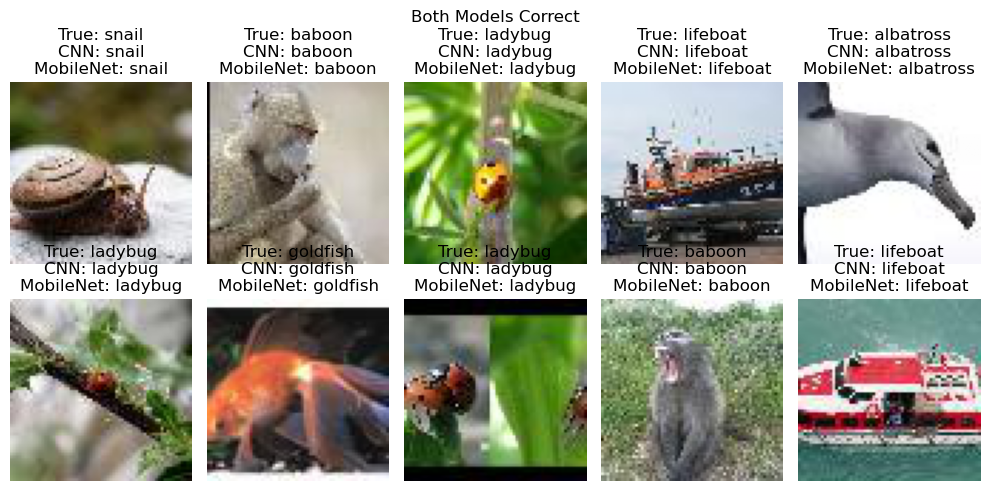

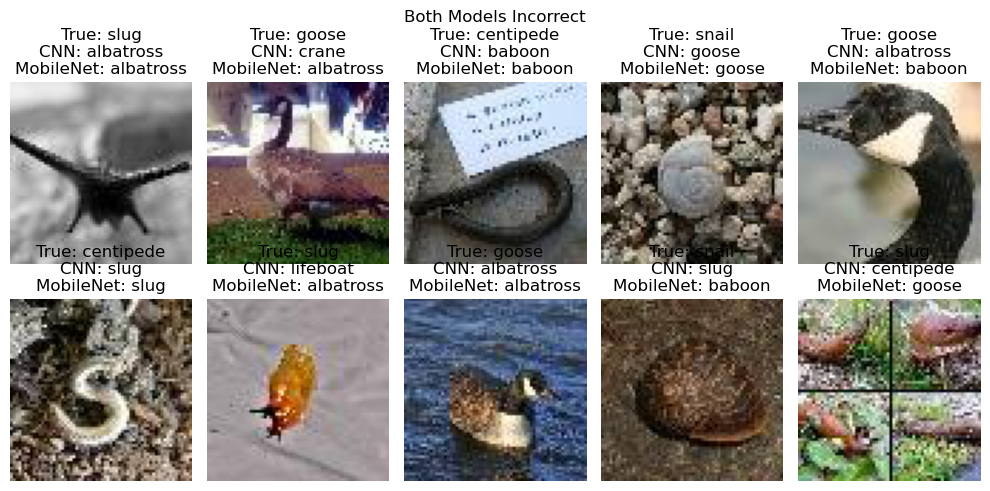

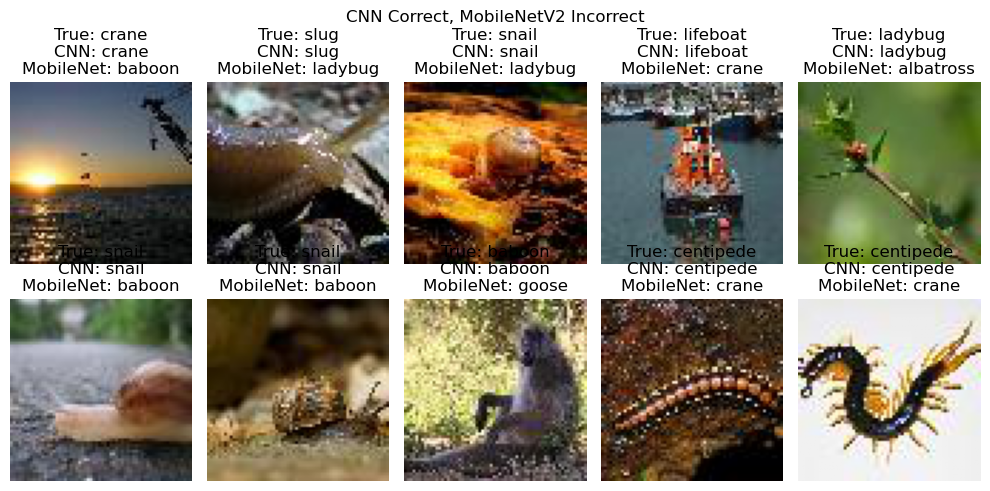

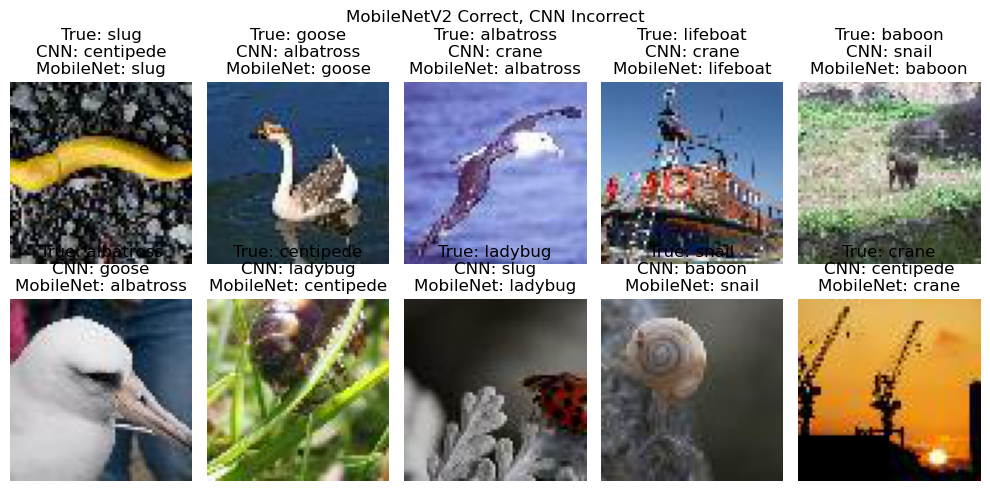

In [40]:
# Make predictions for both models on the validation set
cnn_val_predictions = np.argmax(cnn_model.predict(X_val), axis=1)
mobilenet_val_predictions = np.argmax(model.predict(X_val), axis=1)

# Find indices for each case:
# (i) Both models correctly classified
both_correct_indices = np.where((cnn_val_predictions == y_val) & (mobilenet_val_predictions == y_val))[0]

# (ii) Both models incorrectly classified
both_incorrect_indices = np.where((cnn_val_predictions != y_val) & (mobilenet_val_predictions != y_val))[0]

# (iii) CNN classified correctly but MobileNetV2 did not
cnn_correct_mobilenet_incorrect_indices = np.where((cnn_val_predictions == y_val) & (mobilenet_val_predictions != y_val))[0]

# (iv) MobileNetV2 classified correctly but CNN did not
mobilenet_correct_cnn_incorrect_indices = np.where((cnn_val_predictions != y_val) & (mobilenet_val_predictions == y_val))[0]

# Function to display images from the validation set
def displayImages(X, y_true, cnn_pred, mobilenet_pred, class_names, indices, title, num_images=10):
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(indices[:num_images]):
        plt.subplot(2, 5, i+1)
        plt.imshow(X[idx])
        plt.title(f"True: {class_names[y_true[idx]]}\nCNN: {class_names[cnn_pred[idx]]}\nMobileNet: {class_names[mobilenet_pred[idx]]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# (i) Display examples where both models classified correctly
displayImages(X_val, y_val, cnn_val_predictions, mobilenet_val_predictions, class_names, both_correct_indices, "Both Models Correct", num_images=10)

# (ii) Display examples where both models classified incorrectly
displayImages(X_val, y_val, cnn_val_predictions, mobilenet_val_predictions, class_names, both_incorrect_indices, "Both Models Incorrect", num_images=10)

# (iii) Display examples where CNN classified correctly but MobileNetV2 did not
displayImages(X_val, y_val, cnn_val_predictions, mobilenet_val_predictions, class_names, cnn_correct_mobilenet_incorrect_indices, "CNN Correct, MobileNetV2 Incorrect", num_images=10)

# (iv) Display examples where MobileNetV2 classified correctly but CNN did not
displayImages(X_val, y_val, cnn_val_predictions, mobilenet_val_predictions, class_names, mobilenet_correct_cnn_incorrect_indices, "MobileNetV2 Correct, CNN Incorrect", num_images=10)